# Image Compression using K-Means
### Unsupervised algorithms means that our datasets using only input vectors(X) without referring to labelled, outcomes(Y).
## The objective of K-means
- Group similar data points together and discover underlying patterns. 
- K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster
- The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

## Problem Statement
Digital images are 2- dimensional array of pixels, and they often require to be compressed in order to facilitate portability and storage . The higher the compression ratio, the size decreases, but the compressed image quality will be affected. 

In [49]:
#Importing required libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import pandas as pd
import seaborn as sns
import cv2

### Steps
1. Image Input: Load the image from disk.
2. Preprocessing: Reshape Input Image: The input image must be changed from (rows, cols, 3), to (rows*cols, 3).
3. Clustering: Implement the k-Means clustering algorithm to find k-centroid points that represent its surrounding color combination.
4. Compression: Replace each pixel with its centroid points: Replace the value of each of the pixels with its centroid point.
5. Output Compressed Image: Display the output image and store it to disk. 
6. Image Comparison
7. Evaluation Metrics

---
## Step 1: Input of Image

In [50]:
# Add image path
image_location = "C:\\Users\\krish\\Downloads\\college\\Project\\Kmeans\\images\\sunset.jpg"

---
## Step 2: Preprocessing
Before applying k-mean clustering, image data (pixels) must be preprocessed. Images are in RGB color. These pixels are arranged in the form of a matrix with a number of columns and rows with a color for each point. The k-mean clustering needs to manipulate the image pixels as vector. 
#### Change of Dimensions
The input image can take any shape in the form of [x,y,3] (where 3 defines that the image is RGB).

After preprocessing the dimensions are changed to [x*y,3]


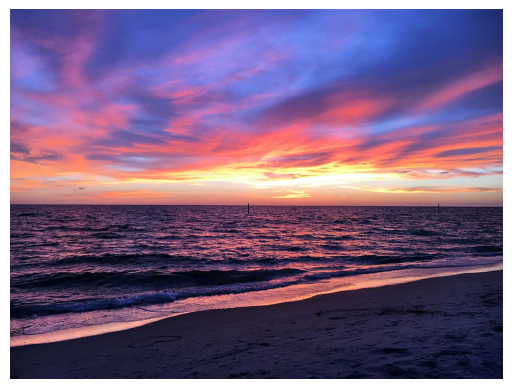

Before Preprocessing: Image shape = (683, 910, 3)
After Preprocessing: Image shape =  (621530, 3)


In [51]:
# Reading the image
image = io.imread(image_location)
plt.imshow(image)
plt.axis(False)
plt.show()

#Extract the numerical representations of pixels with (R,G,B) values
#it converts the MxNx3 image into a Kx3 matrix where K=MxN 
# Each row is now a vector in the 3-D space of RGB
print("Before Preprocessing: Image shape = " + str(image.shape))
all_pixels = image.reshape((-1,3))
print("After Preprocessing: Image shape = ",all_pixels.shape)

### Data Visualization

In [52]:
#Data Preprocessing
img = io.imread(image_location)
img_data = (img / 255.0).reshape(-1, 3)

# Class to print scatter plot
# R vs B and R vs G
class plot_utils:
    def __init__(self, img_data, title, num_pixels=10000, colors=None):
        self.img_data = img_data
        self.title = title
        self.num_pixels = num_pixels
        self.colors = colors

    def colorSpace(self):
        if self.colors is None:
            self.colors = self.img_data

        rand = np.random.RandomState(42)
        index = rand.permutation(self.img_data.shape[0])[:self.num_pixels]
        colors = self.colors[index]
        R, G, B = self.img_data[index].T
        fig, ax = plt.subplots(1, 2, figsize=(12,8))
        ax[0].scatter(R, G, color=colors, marker='.')
        ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
        ax[1].scatter(R, B, color=colors, marker='.')
        ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
        fig.suptitle(self.title, size=20)

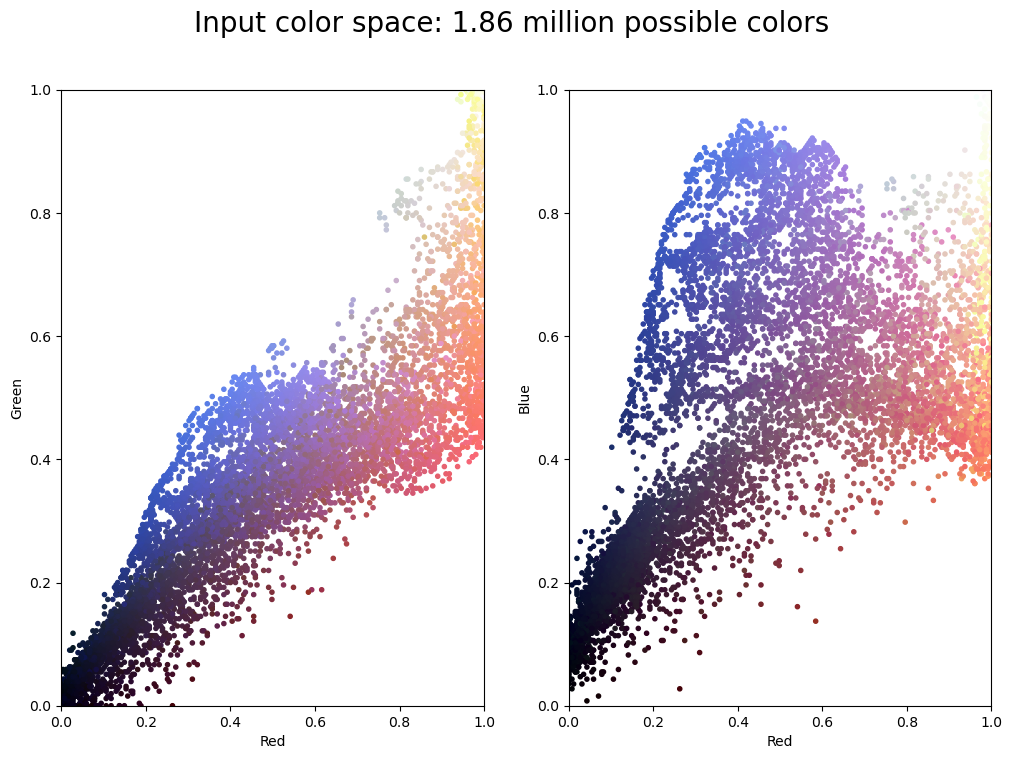

In [53]:
# Printing number of colors which are possible
i = image.shape
i = i[0]*i[1]*i[2]
i = i/1000000
i = round(i, 2)
x = plot_utils(img_data, title=f'Input color space: {i} million possible colors')
x.colorSpace()

---
## Step 3: K - Means Algorithm


### **How the K-means algorithm works?**

To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids

**1. Cluster assignment**<br>
the algorithm goes through each of the data points and depending on which cluster is closer, It assigns the data points to one of the cluster centroids.<br>
**2. Updation centroid**<br>
K-means moves the centroids to the average of the points in a cluster. In other words, the algorithm calculates the average of all the points in a cluster and moves the centroid to that average location.
This process is repeated until there is no change in the clusters. K is chosen randomly or by giving specific initial starting points by the us.

![SegmentLocal](https://user-images.githubusercontent.com/42711978/87918133-9e1e2380-ca93-11ea-9237-bbe5ef68c084.gif "segment")

### Elbow Method - Finding optimal K
- Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.
- Inertia: It is the sum of squared distances of samples to their closest cluster center.

We iterate the values of k from 1 to 10 and calculate the values of distortions for each value of k and calculate the distortion and inertia for each value of k in the given range.

k =  1
k =  2
k =  3
k =  4
k =  5
k =  6
k =  7
k =  8
k =  9
k =  10
[7400517111.697054, 2720777492.8995943, 1513137148.3921587, 1168644613.9241564, 885307472.926442, 732871398.3695643, 687774928.1648692, 529351907.1859584, 485415952.33291703, 441343646.86962175]


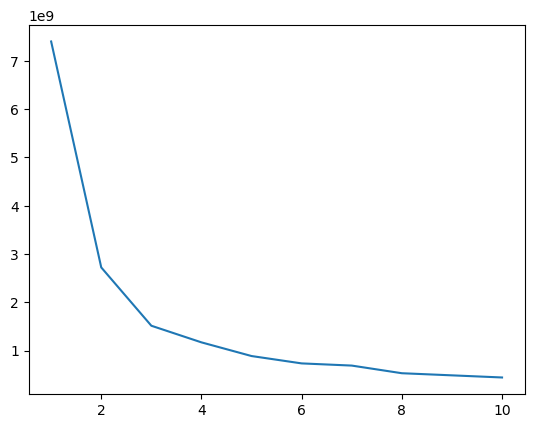

In [54]:
from sklearn.cluster import MiniBatchKMeans
# Array to hold cluster centroirds
wcss1 = []

# For k in range from 1 to 10
for i in range(1, 11):
    kmeans = MiniBatchKMeans(i).fit(all_pixels) # Sklearn MinibatchKmeans
    wcss1.append(kmeans.inertia_) # Inertia is sum of L2 distance between centroid and pixels
    print("k = ",i)
    
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(wcss1)
# Plotting the graph
sns.lineplot(x = ks, y = wcss1);

### Determing the value of K from Elbow-Method Graph
To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 5.

In [55]:
# Taking input of k for kmeans
k = input()
k = int(k)

5


## Building Model 

Implement K-Means Algorithm Using Scikit-Learn

```python
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k, random_state=42) 
kmeans.fit(points)
kmeans.labels_
```
Here 'k' means the number of clusters, which was determined using elbow method.
Kmeans 

In [56]:
#Build a clustering model on the pixels
kmeans = KMeans(n_clusters=k) # Sklearn Kmeans
kmeans.fit(all_pixels)
kmeans_centroids = np.array(kmeans.cluster_centers_, dtype="uint") # Stores the centroids of the cluster

CLUSTER-LEVEL DOMINANT COLOURS (K = 5)


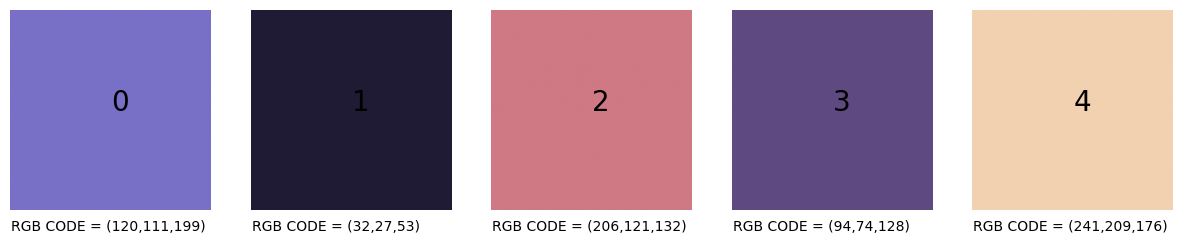

In [57]:
# Plotting the dominant colors
fig, axs = plt.subplots(1, k)
fig.set_size_inches(3 * k, 3, forward=True)

# Based on the centroid coordinates, plotting the coresponding pixel
for clusternumber in range(0,len(kmeans_centroids)):
    centroid = np.zeros((100,100,3))
    centroid[:,:,:] = kmeans_centroids[clusternumber]
    axs[clusternumber].imshow(centroid/255)
    axs[clusternumber].text(50,50,str(clusternumber),fontsize=20)
    axs[clusternumber].axis("off")
    i = kmeans_centroids[clusternumber]
    x1 = i[0]
    x2 = i[1]
    x3 = i[2]
    x = "RGB CODE = (" + str(x1) + "," + str(x2) + "," + str(x3) + ")"
    axs[clusternumber].text(0,110,x)
print("CLUSTER-LEVEL DOMINANT COLOURS (K = " + str(k) + ")")
plt.show()

## Step 4: Compression

Replace each pixel with its centroid points

Replace the value of each of the pixels with its centroid point.

In [58]:
#This is done by assigning each pixel to be the dominant colour of the cluster it belongs to.
image_compressed = np.zeros((all_pixels.shape[0], 3), dtype="uint")

# Changing the pixel to the corresponding cluster
for ix in range(all_pixels.shape[0]):
    image_compressed[ix] = kmeans_centroids[kmeans.labels_[ix]]
image_compressed = image_compressed.reshape(image.shape)

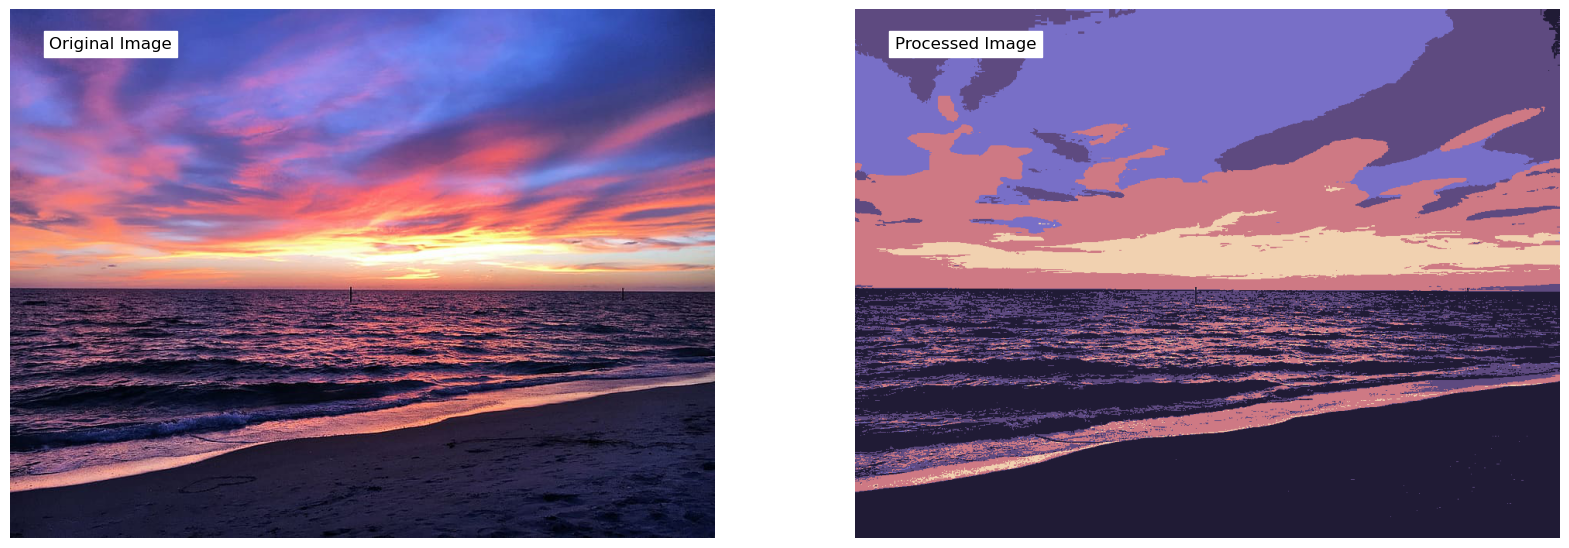

In [59]:
#Let us compare our image and compressed image
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(20, 10, forward=True)

axs[0].imshow(image)
axs[0].text(50,50,"Original Image", fontsize=12, c = 'black', backgroundcolor = 'white')
axs[0].axis(False)

axs[1].imshow(image_compressed)
axs[1].text(50,50,"Processed Image", fontsize=12, c = 'black', backgroundcolor = 'white')
axs[1].axis(False)

plt.show()


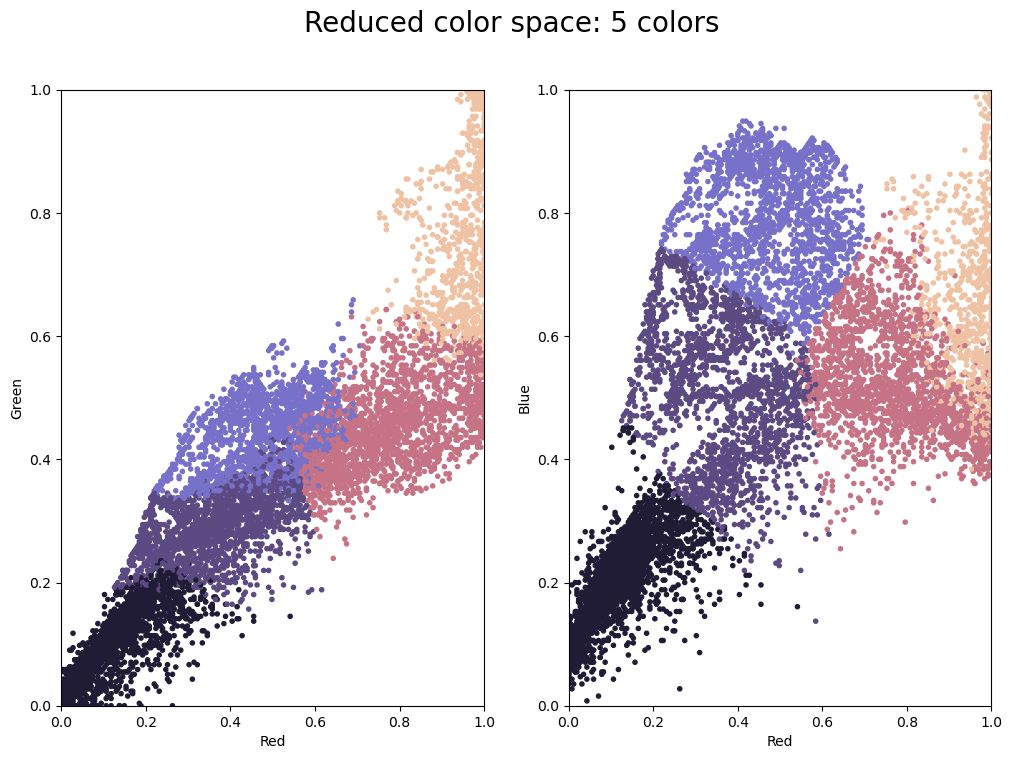

In [60]:
from sklearn.cluster import MiniBatchKMeans
#high resolution images ==MiniBatchKMeans==>small batches '
kmeans = MiniBatchKMeans(k).fit(img_data)
k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)] #here we are predicting 16 colors on the img 

y = plot_utils(img_data, colors=k_colors, title=f"Reduced color space: {k} colors")
y.colorSpace()

In [61]:
import ipywidgets as widgets
from ipywidgets import *

# Sliding widget from ipywidgets
@interact #decorater 
def color_compression(k=IntSlider(min=1,max=256,step=1,value=16,
                                                             continuous_update=False,
                                                             layout=dict(width='100%'))):
    # Preprocessing
    input_img = io.imread(image_location)
    img_data = (input_img / 255.0).reshape(-1, 3)
    
    # Sklearn MiniBatchKmeans
    kmeans = MiniBatchKMeans(k).fit(img_data)
    k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]
    
    # Converting pixels to the coressponding cluster
    k_img = np.reshape(k_colors, (input_img.shape))
    
    # Plotting the images
    fig, (ax1,ax2) = plt.subplots(1, 2)
    fig.set_size_inches(30, 10, forward=True)
    fig.suptitle('K-means Clustering (Dominant colors Extraction)', fontsize=50)
    
    ax1.set_title('Compressed')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(k_img)
    
    ax2.set_title('Original')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.imshow(input_img)
    
    plt.subplots_adjust(top=0.85)
    plt.show()

interactive(children=(IntSlider(value=16, continuous_update=False, description='k', layout=Layout(width='100%'…

## Step 5: Saving compressed images

### Saving compressed images based on number of clusters(k)

where k = 2, 4, 8, 16, 32, 64, 128, 256, 512, 1028

In [62]:
# Function to save the compressed images
def compression(cluster_number):
    # Reshaping and preprocessing
    input_img = io.imread(image_location)
    img_data = (input_img / 255.0).reshape(-1, 3)

    # Sklearn MinibatchKmeans
    kmeans = MiniBatchKMeans(cluster_number).fit(img_data)
    k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]
    k_img = np.reshape(k_colors, (input_img.shape))
    
    
    # Path of input image and output directory
    image_name_ext = image_location.replace("C:\\Users\\krish\\Downloads\\college\\Project\\Kmeans\\images\\", "")
    image_name = image_name_ext.replace(".jpg","")
    image_name = image_name + f"_{cluster_number}"
    
    # Storing both .jpg and .png
    plt.imsave(f"output//{image_name}.png", k_img, cmap='Greys')
    plt.imsave(f"output//{image_name}.jpg", k_img, cmap='Greys')

In [63]:
# Storing in the form of clusters ranging from k = 2 to 1028
ks = [2,4,8,16,32,64,128,256,512,1028]
for cn in ks:
    compression(cn)

## Step 6: Image Comparison
### Size of Compressed Images vs Number of Clusters

sunset_2
sunset_4
sunset_8
sunset_16
sunset_32
sunset_64
sunset_128
sunset_256
sunset_512
sunset_1028


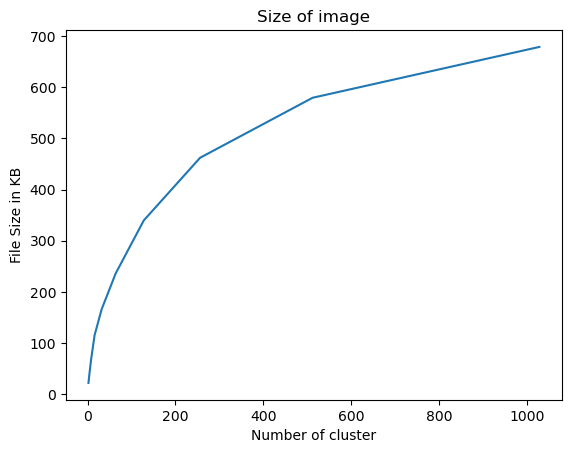

In [64]:
# Comparing the sizes of images with the original
import os
ks = [2,4,8,16,32,64,128,256,512,1028]
filearray = []
for i in ks:
    # Path of input image and output directory
    image_name_ext = image_location.replace("C:\\Users\\krish\\Downloads\\college\\Project\\Kmeans\\images\\", "")
    image_name = image_name_ext.replace(".jpg","")
    image_name = image_name + f"_{i}"
    print(image_name)
    file_size = os.path.getsize(f'C:\\Users\\krish\\Downloads\\college\\Project\\Kmeans\\output\\{image_name}.png')
    file_size = file_size/1024
    filearray.append(file_size)
    
# Plotting the graph
plt.plot(ks, filearray)
plt.title("Size of image")
plt.xlabel("Number of cluster")
plt.ylabel("File Size in KB")
plt.show()

## Step 7: Evaluation Metrics

### Peak Signal to Noise Ratio (PSNR) value
PSNR is used to calculate the ratio between the maximum possible signal power and the power of the distorting noise which affects the quality of its representation. This ratio between two images is computed in decibel form. The PSNR is usually calculated as the logarithm term of decibel scale because of the signals having a very wide dynamic range. This dynamic range varies between the largest and the smallest possible values which are changeable by their quality.

MSE:
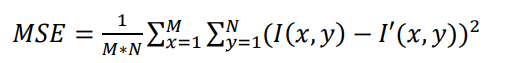

PSNR:
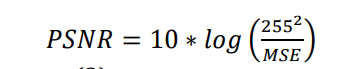
### Note: Higher the value, similar are the images

In [65]:
from math import log10, sqrt
import cv2
import numpy as np
import PIL.Image

# Calculating PSNR value
def PSNR(original, compressed):
    
    # Calculating MSE
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
  
def image_paths(cn):
    # Path of image and compressed image
    image_name_ext = image_location.replace("C:\\Users\\krish\\Downloads\\college\\Project\\Kmeans\\images\\", "")
    image_name = image_name_ext.replace(".jpg","")
    image_name = image_name + f"_{cn}"
    image_name = "C:\\Users\\krish\\Downloads\\college\\Project\\Kmeans\\output\\" + image_name + '.png'
    print(image_name)

    # Reading the images
    original = io.imread(image_location)
    compressed = PIL.Image.open(image_name)
    # Converting image to RGB
    compressed = compressed.convert('RGB')
    value = PSNR(original, compressed)
    return value

C:\Users\krish\Downloads\college\Project\Kmeans\output\sunset_2.png
C:\Users\krish\Downloads\college\Project\Kmeans\output\sunset_4.png
C:\Users\krish\Downloads\college\Project\Kmeans\output\sunset_8.png
C:\Users\krish\Downloads\college\Project\Kmeans\output\sunset_16.png
C:\Users\krish\Downloads\college\Project\Kmeans\output\sunset_32.png
C:\Users\krish\Downloads\college\Project\Kmeans\output\sunset_64.png
C:\Users\krish\Downloads\college\Project\Kmeans\output\sunset_128.png
C:\Users\krish\Downloads\college\Project\Kmeans\output\sunset_256.png
C:\Users\krish\Downloads\college\Project\Kmeans\output\sunset_512.png
C:\Users\krish\Downloads\college\Project\Kmeans\output\sunset_1028.png


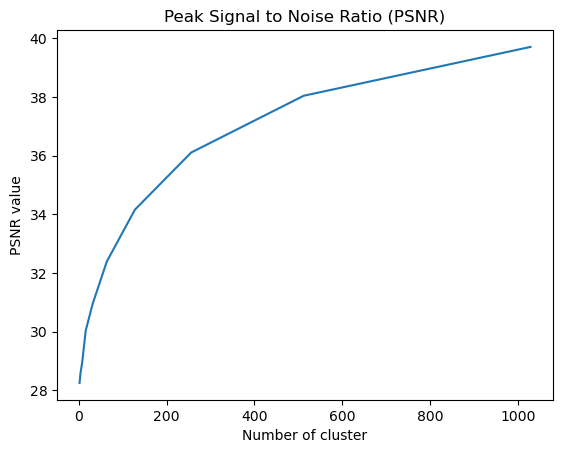

In [66]:
# Plotting the graph
ks = [2,4,8,16,32,64,128,256,512,1028]
PSNRvalue = []
for cn in ks:
    PSNRvalue.append(image_paths(cn))
    
    
plt.plot(ks, PSNRvalue)
plt.title("Peak Signal to Noise Ratio (PSNR)")
plt.xlabel("Number of cluster")
plt.ylabel("PSNR value")
plt.show()

### Structural Similarity Index Method (SSIM) value
Structural Similarity Index Method is a perception based model. 
In this method, image degradation is considered as the change of perception in structural information. It also collaborates some other important perception based fact such as luminance masking, contrast masking, etc.


Structural Similarity Index measure (SSIM) measures the
similarity degree between two images. this measure can be
computed based on luminance l, contrast c and structure s as
follows: 
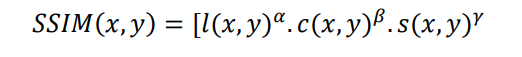

### Note: Ranges from 0 to 1, Higher the value, similar are the images

In [67]:
from SSIM_PIL import compare_ssim
from PIL import Image

# Calculating SSIM value
def SSIM(cn):
    image_name_ext = image_location.replace("C:\\Users\\krish\\Downloads\\college\\Project\\Kmeans\\images\\", "")
    image_name = image_name_ext.replace(".jpg","")
    image_name = image_name + f"_{cn}"
    image_name = "C:\\Users\\krish\\Downloads\\college\\Project\\Kmeans\\output\\" + image_name + '.jpg'
    print(image_name)

    image1 = Image.open(image_location)
    image2 = Image.open(image_name)

    value = compare_ssim(image1, image2)
    return value

In [68]:
ks = [2,4,8,16,32,64,128,256,512,1028]
SSIMvalue = []
for cn in ks:
    SSIMvalue.append(SSIM(cn))


C:\Users\krish\Downloads\college\Project\Kmeans\output\sunset_2.jpg
C:\Users\krish\Downloads\college\Project\Kmeans\output\sunset_4.jpg
C:\Users\krish\Downloads\college\Project\Kmeans\output\sunset_8.jpg
C:\Users\krish\Downloads\college\Project\Kmeans\output\sunset_16.jpg
C:\Users\krish\Downloads\college\Project\Kmeans\output\sunset_32.jpg
C:\Users\krish\Downloads\college\Project\Kmeans\output\sunset_64.jpg
C:\Users\krish\Downloads\college\Project\Kmeans\output\sunset_128.jpg
C:\Users\krish\Downloads\college\Project\Kmeans\output\sunset_256.jpg
C:\Users\krish\Downloads\college\Project\Kmeans\output\sunset_512.jpg
C:\Users\krish\Downloads\college\Project\Kmeans\output\sunset_1028.jpg


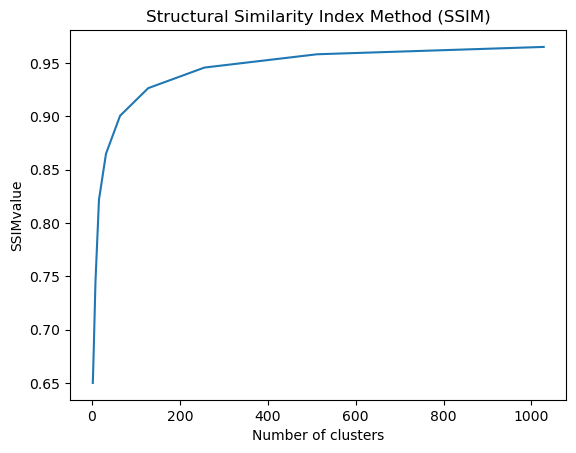

In [69]:
plt.plot(ks, SSIMvalue)
plt.title("Structural Similarity Index Method (SSIM)")
plt.xlabel("Number of clusters")
plt.ylabel("SSIMvalue")
plt.show()